**Import packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

**Import Dataset**

In [ ]:
ds = pd.read_csv("clustering_data.csv")

In [ ]:
df = ds.copy()

Take a inital look at the first few rows

In [ ]:
df.head()

,Unnamed: 0,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,0,M,33.0,1,Coach,SCA Website Booking,Nonmember,151.63
1,1,M,24.0,1,Coach,Outside Booking,Nonmember,205.58
2,2,F,54.0,1,Coach,Airport,Nonmember,264.19
3,3,M,52.0,2,Coach,Tour Operator Portal,Nonmember,0.00
4,4,M,29.0,2,Coach,Outside Booking,Standard,432.56


## Data Preparation

#### drop Unnamed: 0 *Column*

In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

,GenderCode,Age,TicketNum,BkdClassOfService,BookingChannel,UflyMemberStatus,BaseFareAmt
0,M,33.0,1,Coach,SCA Website Booking,Nonmember,151.63
1,M,24.0,1,Coach,Outside Booking,Nonmember,205.58
2,F,54.0,1,Coach,Airport,Nonmember,264.19
3,M,52.0,2,Coach,Tour Operator Portal,Nonmember,0.00
4,M,29.0,2,Coach,Outside Booking,Standard,432.56


#### Deal with a skewed data.

Take a log of the TicketNum, as it is right skewed.

<AxesSubplot:>

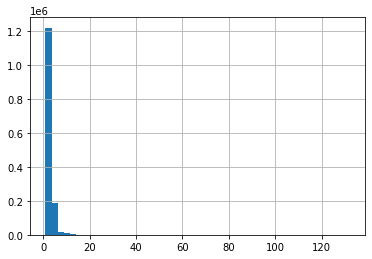

In [ ]:
df.TicketNum.hist(bins=50)

In [ ]:
df.TicketNum = np.log(df.TicketNum)

#### Data Filtering
##### Filter out the GenderCode value 'U'

In [ ]:
df.GenderCode.value_counts()

F    762328
M    681266
U        19
Name: GenderCode, dtype: int64

In [ ]:
df = df.loc[df.GenderCode != 'U']

In [ ]:
df.BkdClassOfService.value_counts()

Coach                   1414610
First Class               28808
Discount First Class        176
Name: BkdClassOfService, dtype: int64

In [ ]:
df.loc[df.BkdClassOfService == 'Discount First Class', 'BkdClassOfService'] = 'First Class'

Convert to the One Hot Encoding for the categorical data. 

In [ ]:
categorical_cols = ['GenderCode', 'BkdClassOfService', 'BookingChannel', 'UflyMemberStatus']

enc = OneHotEncoder(drop='if_binary')
one_hot = enc.fit_transform(df[categorical_cols]).toarray()
one_hot_df = pd.DataFrame(one_hot, columns=enc.get_feature_names_out())
one_hot_df

,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1443589,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1443590,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1443591,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1443592,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



#### standarized numerical data columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443594 entries, 0 to 1443612
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   GenderCode         1443594 non-null  object 
 1   Age                1443594 non-null  float64
 2   TicketNum          1443594 non-null  float64
 3   BkdClassOfService  1443594 non-null  object 
 4   BookingChannel     1443594 non-null  object 
 5   UflyMemberStatus   1443594 non-null  object 
 6   BaseFareAmt        1443594 non-null  float64
dtypes: float64(3), object(4)
memory usage: 88.1+ MB


In [ ]:
numeric_df = df.select_dtypes("float64")

scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled, columns=numeric_df.columns)
scaled_df

,Age,TicketNum,BaseFareAmt
0,-0.364057,-1.456643,-0.703947
1,-0.837727,-1.456643,-0.391090
2,0.741173,-1.456643,-0.051208
3,0.635913,-0.047404,-1.583255
4,-0.574577,-0.047404,0.925175
...,...,...,...
1443589,1.109583,-1.456643,0.612259
1443590,1.109583,-0.047404,-0.407211
1443591,-0.416687,-0.047404,0.229291
1443592,-0.048277,-0.047404,-0.094411


- combine the scaled numeric columns and one hot encoded categorical columns.

In [ ]:
df_normalized = pd.concat([scaled_df, one_hot_df], axis=1)
df_normalized.head()

,Age,TicketNum,BaseFareAmt,GenderCode_M,BkdClassOfService_First Class,BookingChannel_Airport,BookingChannel_Outside Booking,BookingChannel_Reservations Booking,BookingChannel_SCA Website Booking,BookingChannel_SY Vacation,BookingChannel_Tour Operator Portal,UflyMemberStatus_Elite,UflyMemberStatus_Nonmember,UflyMemberStatus_Standard
0,-0.364057,-1.456643,-0.703947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.837727,-1.456643,-0.391090,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.741173,-1.456643,-0.051208,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.635913,-0.047404,-1.583255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.574577,-0.047404,0.925175,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

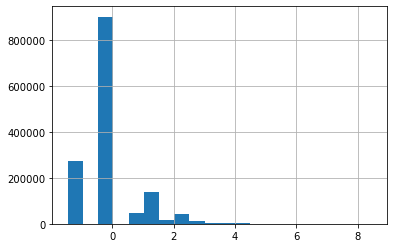

In [ ]:
df_normalized.TicketNum.hist(bins=20)

## Sampling 
#### Take 0.5% of the entire data as a sample data and save it as a csv file. 

In [ ]:
df_sample_five = df_normalized.sample(frac=0.005, axis=0, random_state=42)

In [ ]:
df_sample_five.shape

(7218, 14)

In [ ]:
df_sample_five.to_csv("clustering_data_sample_final.csv")